# Compton - with uncertainties


A look at the final part of the Compton experiment where the $1-cos(\theta)$ Vs $1/E_{out}$ data is plotted, hopefully to show a straight line relationship, helping to confirm the hypothesis that photons carry momentum.


This program uses Scipy to fit a line to the data with associated errors, giving
values for the gradient, m, and associated intercept, c, along with calculated uncertainties. 


This allows a value for the mass of the electron to be calcualted allong with an
uncertainty value.


Based on:

https://micropore.wordpress.com/2017/02/04/python-fit-with-error-on-y-axis/



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Set the size of subsequent plots
plt.rcParams['figure.figsize']=[12,8]


We'll just define a straight line function here - but it could be any curve


In [2]:
# Just a simple function to return a straight line.
def stLine_func(x, m, c):
    return m * x  + c


Read in the data...

Column 1 is $1-cos(\theta)$ and has a column heading '1_cos'
Column 2 is $1/E_{out}$ and has a column heading '1_eout'
Column 3 is the error value for 1/Eout and has a column heading 'yerror'

... and set up the x, y and yerror numpy arrays

In [3]:
# Get data col1=x (1_cos) , col2=y (1_eout), col3=y errors (yerror)
# Can't seem to use 1-cos and 1/eout as labels
exp_data=np.genfromtxt('Compton-with-errors.csv', delimiter=',', names=True)

# Set up x and y
x=exp_data['1_cos']
y=exp_data['1_eout']
y0=y
yerror=exp_data['yerror']

# curve fit [with only 'y' errors] - not entirely sure of sigma=yerror 
# but I think absolute_sigma is correct - i.e. True
popt, pcov = curve_fit(stLine_func, x, y, sigma=yerror, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov)) # error values are on the covariance matrix diagonal

#print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('***************************************************')
print ('m = ' + str(popt[0])+' +- '+str(perr[0]))
print ('c = ' + str(popt[1])+' +- '+str(perr[1]))
print('***************************************************')

# prepare confidence level line limits
nstd = 1.0 # to draw 1 sigma interval
# Note, remember these are numpy arrays
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr

# Get the fitted line
fit = stLine_func(x, *popt)
# Add and subtract error values
fit_up = stLine_func(x, *popt_up)
fit_dw = stLine_func(x, *popt_dw)

fit parameter 1-sigma error
***************************************************
m = 0.0022421378162182193 +- 0.0003048502865074448
c = 0.057351601604288684 +- 0.00030408258173098067
***************************************************



The rest is just plotting it

The 'rcParams' just set up some overall plotting properties
The 'ax' 'fill_betwee' gives us solid block of colour between the upper and lower
1-sigma uncertainty bounds for the fitted line.

Note the use of LaTex formating in the axes labels and Title


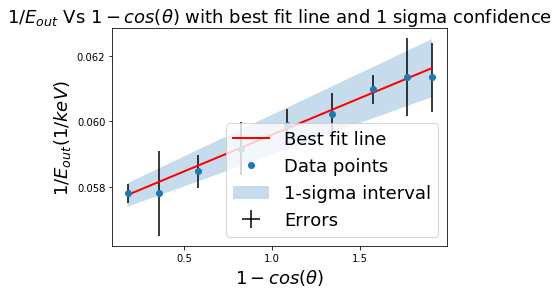

In [4]:
# Set up a plot area
fig, ax = plt.subplots(1)
# Set plot parameters
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size']= 20
plt.errorbar(x, y0, yerr=yerror, xerr=0, hold=True, ecolor='k', fmt='none', label='Errors')

plt.xlabel('$1-cos(\\theta$)', fontsize=18)
plt.ylabel('$1/E_{out} (1/keV)$', fontsize=18)
plt.title('$1/E_{out}$ Vs $1-cos(\\theta)$ with best fit line and 1 sigma confidence', fontsize=18)
plt.plot(x, fit, 'r', lw=2, label='Best fit line')
plt.plot(x, y0, 'o', lw=2, label='Data points')
ax.fill_between(x, fit_up, fit_dw, alpha=.25, label='1-sigma interval')
plt.legend(loc='lower right',fontsize=18)
plt.show()


Finally we can use the gradient (which is $1 \over m_ec^2$) to get an estimate for the mass of the electron


In [5]:
gradient = popt[0]
gradient_error = perr[0]
fractErr = gradient_error/gradient

mec2 = 1/popt[0]

print('mass of electron is '+ str(mec2) + ' +/- ' + str(mec2*fractErr) + ' keV/c^2')


mass of electron is 446.00291416817777 +/- 60.64039203292729 keV/c^2
